<!DOCTYPE html>
<html>
<head>
    <title>Calibration du Modèle de Pricing d'Options</title>
</head>
<body>
    <h1>Calibration du Modèle de Pricing d'Options en utilisant le modèle de Heston avec Python pour Tesla</h1>
    <p>
        <strong>Auteur:</strong> Nguyen Hoang Tung PHAM<br>
        <strong>Formation:</strong> Master 2 MBFA - Parcours IGF<br>
        <strong>Formation supplémentaire:</strong> DU Big Data, Data Science, Analyse de risque sous Python
    </p>
</body>
</html>

% Define the title and author

\title{Calibration du Modèle de Pricing d'Options en utilisant le modèle de Heston avec Python pour Tesla}

\author{Nguyen Hoang Tung PHAM \\

Master 2 MBFA - Parcours IGF\\

DU Big Data, Data Science, Analyse de risque sous Python}

\date{}

\maketitle

# Structure du Rapport


1. **Introduction**
   - Présentation du sujet de la calibration de modèle de pricing d'options.
   - Brève explication de l'importance de cette calibration.

2. **Théorie de base**
   - Explication des concepts fondamentaux de la tarification des options.
   - Introduction au modèle de Black-Scholes et Heston.

3. **Méthodologie de calibration**
   - Description de la méthode pour la calibration du modèle.

4. **Implémentation du code**
   - Présentation du code pour la calibration du modèle.

5. **Analyse des résultats et Conclusion**
   - Présentation et interprétation des résultats de la calibration.
   - Discussion sur l'efficacité de la calibration et ses implications pour la tarification des options.

6. **Références**
   - Liste de toutes les sources et références utilisées.

\pagebreak

# Introduction


##  Contexte et objectif

L'objectif de ce rapport est d'examiner et de calibrer le modèle de pricing d'options dans un contexte financier spécifique, en utilisant les options sur l'action Tesla (TSLA) comme cas d'étude. Cette démarche s'inscrit dans un contexte où les marchés financiers sont de plus en plus complexes et volatiles, rendant la précision des modèles de pricing plus cruciale que jamais.

Le modèle Heston, choisi pour cette étude, se distingue par sa capacité à modéliser la volatilité stochastique, un élément clé dans la tarification des options. La calibration de ce modèle permet d'ajuster ses paramètres de manière à ce que les prix théoriques qu'il génère correspondent au mieux aux prix observés sur le marché. Cette démarche est fondamentale pour garantir la pertinence et la fiabilité des évaluations des options.

## Données utilisées

Pour notre analyse, les données sur les options de Tesla (TSLA) issues de Yahoo Finance ont été sélectionnées. Bien que la période des données disponibles varie entre le 22 décembre 2023 et le 16 janvier 2026, notre attention se concentre principalement sur la date de maturité du 19 janvier 2024. Ce choix est dicté par plusieurs facteurs. Premièrement, cette date représente une échéance proche, offrant une perspective pertinente sur le comportement actuel du marché et sur la réactivité du modèle Heston face à des conditions de marché immédiates. Deuxièmement, cette date spécifique permet une analyse approfondie et ciblée, évitant la dispersion des résultats sur une période trop étendue qui pourrait diluer les spécificités et les nuances du marché.
Le choix de Tesla comme actif sous-jacent est motivé par sa volatilité et sa popularité sur les marchés, offrant ainsi un terrain d'analyse riche et pertinent. De plus, l'utilisation de données récentes permet de refléter au mieux la dynamique actuelle du marché.

## Importance de la calibration du modèle Heston

Il est capital pour les décideurs financiers de calibrer avec précision le modèle de Heston. Une calibration adéquate permet non seulement d'évaluer de manière optimale le prix des options, mais elle offre également un éclairage essentiel sur les tendances et la dynamique du marché sous-jacent, facilitant ainsi la prise de décisions informées et stratégiques en matière d'investissement et de gestion des risques.

Ce rapport ambitionne de démontrer comment une calibration efficace et ciblée du modèle Heston, en se concentrant sur une date de maturité spécifique, peut améliorer la compréhension et la gestion des produits dérivés complexes tels que les options.

\pagebreak

# Théorie de base


## Modèle Black-Scholes

Le modèle de Black-Scholes est un outil fondamental dans la tarification des options. Développé par Fischer Black, Myron Scholes et Robert Merton, ce modèle fournit une formule pour estimer le prix d'une option européenne. Selon ce modèle, le prix de l'option dépend de cinq paramètres principaux : le prix actuel de l'actif sous-jacent, le prix d'exercice de l'option, le temps jusqu'à l'expiration, le taux d'intérêt sans risque et la volatilité de l'actif sous-jacent.

Une hypothèse clée du modèle Black-Scholes est que la volatilité de l'actif sous-jacent est constante sur la durée de vie de l'option. Bien que cette hypothèse simplifie le modèle, elle limite sa précision, surtout pour les options à long terme où la volatilité peut varier considérablement.

L'équation de Black-Scholes pour une option d'achat (call) européenne est donnée par :

$$C(S, t) = S_t \cdot N(d_1) - K \cdot e^{-r(T-t)} \cdot N(d_2)$$

où :

- $C(S, t)$ est le prix de l'option d'achat.

- $S_t$ est le prix actuel de l'actif sous-jacent.

- $K$ est le prix d'exercice de l'option.

- $T$ est le temps jusqu'à l'expiration de l'option.

- $r$ est le taux d'intérêt sans risque.

- $N(.)$ est la fonction de distribution cumulative de la loi normale.

- $d_1 = \frac{\ln(\frac{S_t}{K}) + (r + \frac{\sigma^2}{2})(T-t)}{\sigma \sqrt{T-t}}$

- $d_2 = d_1 - \sigma \sqrt{T-t}$

- $\sigma$ est la volatilité du prix de l'actif sous-jacent.


## Modèle de Heston

Le modèle Heston, proposé par Steven Heston, est une amélioration significative par rapport au modèle de Black-Scholes, surtout en ce qui concerne la modélisation de la volatilité. Ce modèle introduit la notion de volatilité stochastique, où la volatilité d'un actif est elle-même un processus aléatoire. 

Le modèle Heston décrit la dynamique du prix de l'actif sous-jacent et sa volatilité à l'aide de deux équations différentielles stochastiques. Une caractéristique importante du modèle Heston est sa capacité à capturer des phénomènes de marché tels que le "Volatility Smile", où la volatilité implicite varie avec le prix d'exercice de l'option, ce que le modèle Black-Scholes ne peut pas expliquer.

Dans le modèle Heston, la dynamique du prix de l'actif $S_t$ et la variance stochastique $v_t$ sont décrites par les équations différentielles stochastiques suivantes :

$$dS_t = \mu S_t dt + \sqrt{v_t} S_t dW_{t}^{1}$$

$$dv_t = \kappa (\theta - v_t) dt + \xi \sqrt{v_t} dW_{t}^{2}$$

où :

- $S_t$ est la valeur de l'actif au moment $t$.

- $\mu$ est le taux de rendement attendu de l'actif.

- $v_t$ est la variance instantanée (volatilité carrée) de l'actif.

- $\kappa$ est le taux de retour à la moyenne de la variance.

- $\theta$ est la variance à long terme.

- $\xi$ est la volatilité de la volatilité.

- $W_{t}^{1}$ est le processus stochastique de Wiener régissant le processus $S_t$.
  
- $W_{t}^{2}$ est le processus stochastique de Wiener régissant le processus$v_t$.

- La corrélation entre $W_{t}^{1}$ et $W_{t}^{2}$ est $\rho$.

Ces équations capturent la nature dynamique de la volatilité dans le modèle Heston, permettant une modélisation plus précise du prix des options, en particulier pour les marchés où la volatilité n'est pas constante.

\pagebreak

# Méthodologie de calibration

Dans notre étude, j'ai adopté une méthodologie approfondie pour la calibration du modèle de Heston, utilisée dans la tarification d'options, en m'appuyant sur Python et des bibliothèques spécialisées telles que QuantLib et SciPy. Cette approche méthodique se décline en plusieurs étapes essentielles, chacune exploitant les capacités de ces outils pour assurer une calibration précise et efficace.

Initialement, j'ai mis en place un processus structuré pour la collecte et le traitement des données. Cela a inclus l'automatisation de l'extraction des données des options d'achat pour des dates d'expiration spécifiques, en les exportant en fichiers CSV. Cette étape, réalisée grâce à Python, a permis une gestion organisée des données, facilitant l'analyse ultérieure.

Puis, j'ai réimporté ces données sous forme de DataFrames Python pour une manipulation et une analyse continues. Cette réimportation a permis une utilisation répétée et efficace des données collectées. Par ailleurs, j'ai déterminé le prix au comptant de Tesla, une étape cruciale pour ajuster le modèle aux conditions actuelles du marché

Après la collecte des données, une étape distincte a été d'utiliser la méthode de BiSection pour trouver la volatilité implicite des options de Tesla. Cette technique a été privilégiée au lieu d'utiliser la volatilité implicite directement disponible sur Yahoo Finance. Le choix de cette méthode réside dans sa capacité à fournir une estimation plus personnalisée et précise de la volatilité, adaptée spécifiquement à notre modèle et nos données. Cela me permet de capter de manière plus fidèle les nuances du marché spécifique à Tesla, plutôt que de se reposer sur une estimation générique.

QuantLib et SciPy ont ensuite été utilisés pour paramétrer le modèle Heston avec des valeurs initiales et mettre en place des assistants spécifiques. J'ai adopté l'algorithme de Levenberg-Marquardt pour la calibration, reconnu pour sa capacité à résoudre des problèmes de moindres carrés non linéaires. Cet outil, agissant comme un solveur local, affine itérativement une estimation du minimum, combinant différentes techniques d'optimisation pour une calibration précise des paramètres.

Finalement, j'ai généré un rapport de calibration détaillé, évaluant et affichant l'erreur de calibration. Cette analyse m'a permis de comprendre l'écart entre les valeurs du marché et celles estimées par le modèle, fournissant une mesure de la précision de notre modèle calibré.

\pagebreak

# Implémentation du code

## Importation des bibliothèques

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
import QuantLib as ql 
import math
from datetime import datetime

## Gestion des données de marché

### Mise en place de l'accès aux données de marché

Ce bloc de code représente la première étape cruciale de notre projet, établissant l'accès aux données de marché nécessaires pour la calibration du modèle de pricing. J'ai choisi le ticker TSLA, représentant l'action de Tesla, un acteur majeur du marché des véhicules électriques et sujet de notre étude. L'utilisation de la bibliothèque `yfinance` est déterminante ici, car elle offre un accès direct et efficace aux informations financières actualisées. Cette étape initiale jette les bases pour l'extraction et l'analyse rigoureuse des données relatives aux options de Tesla, qui seront par la suite intégrées dans l'application du modèle de Heston. Cette approche garantit que je travaille avec des données pertinentes et à jour, reflétant les conditions de marché actuelles de Tesla, ce qui est indispensable pour une calibration précise et pertinente du modèle.

In [2]:
# Définition du ticker pour lequel je souhaite récupérer les données d'options
ticker = 'TSLA'

# Utilisation de yfinance pour accéder aux données du ticker
tsla = yf.Ticker(ticker)

In [3]:
# Récupération des dates d'expiration des options pour le Tesla
expiration_dates = tsla.options

In [4]:
# Affichage des dates d'expiration possibles
expiration_dates

('2023-12-22',
 '2023-12-29',
 '2024-01-05',
 '2024-01-12',
 '2024-01-19',
 '2024-01-26',
 '2024-02-16',
 '2024-03-15',
 '2024-04-19',
 '2024-05-17',
 '2024-06-21',
 '2024-07-19',
 '2024-09-20',
 '2025-01-17',
 '2025-06-20',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16')

### Extraction du prix au comptant pour l'analyse des options

Dans ce segment, l'objectif est de récupérer et de déterminer le prix au comptant (spot price) de Tesla. Le processus commence par la collecte des données historiques de prix pour Tesla sur la dernière journée de trading. Cette démarche assure que l'analyse se base sur les données les plus récentes et pertinentes.

Après avoir obtenu l'historique des prix, le code extrait spécifiquement le dernier prix de clôture de la journée. Ce prix de clôture est utilisé comme le prix au comptant actuel du Tesla, une valeur de référence importante pour évaluer les options. Enfin, le prix au comptant est affiché, fournissant une information clé pour les étapes suivantes de l'analyse, notamment pour ajuster le modèle de Heston en fonction des conditions actuelles du marché. Ce prix sert de point de départ pour la détermination des paramètres du modèle et pour les calculs subséquents de la valeur des options.

In [6]:
# Récupération de l'historique des prix pour le Tesla sur la dernière journée
data = tsla.history(period="1d")

# Extraction du dernier prix de clôture, qui est notre prix au comptant
spot = data['Close'].iloc[-1]

In [7]:
# Affichage du prix au comptant du Tesla
print(f"Le prix au comptant de {ticker}: ${spot}")

Le prix au comptant de TSLA: $253.5


### Automatisation de l'exportation des données d'options d'achat

Ce bloc de code vise à automatiser l'extraction et l'exportation des données des options d'achat (calls) pour une série de dates d'expiration prédéfinies. L'objectif est de simplifier et d'organiser le processus de collecte de données en générant dynamiquement des fichiers CSV pour chaque date d'expiration. Ces fichiers serviront ensuite à une analyse détaillée dans le cadre de la calibration du modèle de Heston, en offrant un accès facile et structuré aux informations pertinentes sur les options.

In [8]:
# Création des noms de DataFrame pour chaque date d'expiration
dataframe_names = [f'calls_{date.replace("-", "")}' for date in expiration_dates]

# Boucle pour traiter chaque date d'expiration
for date in expiration_dates:
    date_formatted = date.replace('-', '')  # Formatage de la date
    command = f"calls_{date_formatted} = tsla.option_chain('{date}').calls"
    exec(command)  # Exécution de la commande pour récupérer les données d'options d'achat

    # Commande pour exporter les données d'options d'achat en CSV
    csv_command = f"calls_{date_formatted}.to_csv('tesla_data/calls_{date_formatted}.csv')"
    exec(csv_command)  # Exécution de la commande d'exportation

    # Impression de confirmation de l'exportation
    print(f"Données de calls exportées pour la date: {date} sous le fichier 'calls_{date_formatted}.csv'")

Données de calls exportées pour la date: 2023-12-22 sous le fichier 'calls_20231222.csv'
Données de calls exportées pour la date: 2023-12-29 sous le fichier 'calls_20231229.csv'
Données de calls exportées pour la date: 2024-01-05 sous le fichier 'calls_20240105.csv'
Données de calls exportées pour la date: 2024-01-12 sous le fichier 'calls_20240112.csv'
Données de calls exportées pour la date: 2024-01-19 sous le fichier 'calls_20240119.csv'
Données de calls exportées pour la date: 2024-01-26 sous le fichier 'calls_20240126.csv'
Données de calls exportées pour la date: 2024-02-16 sous le fichier 'calls_20240216.csv'
Données de calls exportées pour la date: 2024-03-15 sous le fichier 'calls_20240315.csv'
Données de calls exportées pour la date: 2024-04-19 sous le fichier 'calls_20240419.csv'
Données de calls exportées pour la date: 2024-05-17 sous le fichier 'calls_20240517.csv'
Données de calls exportées pour la date: 2024-06-21 sous le fichier 'calls_20240621.csv'
Données de calls expo

### Réimportation des données d'options pour analyse permanente
Après avoir exporté les données d'options d'achat dans des fichiers CSV (comme vu dans le bloc de code précédent), ce segment s'attache à les réintégrer dans l'environnement de travail sous forme de DataFrames pour des manipulations et analyses ultérieures.

L'avantage de cette approche est double. D'une part, en exportant les données dans des fichiers CSV, j'assure leur sauvegarde et évitons de devoir refaire des requêtes de données, ce qui est à la fois économique en termes de temps et de précision. D'autre part, en réimportant ces données, je les rend facilement accessibles pour des analyses approfondies sans dépendre de connexions en direct aux sources de données et sans avoir à se soucier des fluctuations des données au fil du temps, ce qui est crucial pour la reproductibilité et la fiabilité des analyses.

La création dynamique de DataFrames à partir des fichiers CSV assure une organisation structurée des données, où chaque DataFrame représente les options d'achat pour une date d'expiration spécifique. Cela facilite grandement la manipulation et l'analyse des données, en permettant de travailler avec des ensembles de données distincts et bien définis.

In [9]:
dataframe_names = []

for date in expiration_dates:
    date_formatted = date.replace('-', '')
    file_name = f'calls_{date_formatted}.csv'
    dataframe_name = f'calls_{date_formatted}'

    # Création dynamique d'un DataFrame pour chaque fichier CSV
    globals()[dataframe_name] = pd.read_csv(f"tesla_data/{file_name}", index_col=0)

    # Ajout du nom du DataFrame à la liste
    dataframe_names.append(dataframe_name)

    # Impression de confirmation de la création du DataFrame
    print(f"DataFrame {dataframe_name} crée à partir de '{file_name}'")

# Impression de tous les noms de DataFrames
print("Tous les noms de DataFrame:", dataframe_names)

DataFrame calls_20231222 crée à partir de 'calls_20231222.csv'
DataFrame calls_20231229 crée à partir de 'calls_20231229.csv'
DataFrame calls_20240105 crée à partir de 'calls_20240105.csv'
DataFrame calls_20240112 crée à partir de 'calls_20240112.csv'
DataFrame calls_20240119 crée à partir de 'calls_20240119.csv'
DataFrame calls_20240126 crée à partir de 'calls_20240126.csv'
DataFrame calls_20240216 crée à partir de 'calls_20240216.csv'
DataFrame calls_20240315 crée à partir de 'calls_20240315.csv'
DataFrame calls_20240419 crée à partir de 'calls_20240419.csv'
DataFrame calls_20240517 crée à partir de 'calls_20240517.csv'
DataFrame calls_20240621 crée à partir de 'calls_20240621.csv'
DataFrame calls_20240719 crée à partir de 'calls_20240719.csv'
DataFrame calls_20240920 crée à partir de 'calls_20240920.csv'
DataFrame calls_20250117 crée à partir de 'calls_20250117.csv'
DataFrame calls_20250620 crée à partir de 'calls_20250620.csv'
DataFrame calls_20250919 crée à partir de 'calls_202509

In [10]:
dataframe_names

['calls_20231222',
 'calls_20231229',
 'calls_20240105',
 'calls_20240112',
 'calls_20240119',
 'calls_20240126',
 'calls_20240216',
 'calls_20240315',
 'calls_20240419',
 'calls_20240517',
 'calls_20240621',
 'calls_20240719',
 'calls_20240920',
 'calls_20250117',
 'calls_20250620',
 'calls_20250919',
 'calls_20251219',
 'calls_20260116']

In [18]:
calls_20240119.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionPrice,maturityDate,timeToMaturity
0,TSLA240119C00001670,2023-12-14 14:54:19+00:00,1.67,243.75,251.05,252.10,0.000000,0.000000,29,946,8.429692,True,REGULAR,USD,251.575,2024-01-19,0.090411
1,TSLA240119C00003330,2023-10-10 17:49:28+00:00,3.33,261.10,206.05,207.25,0.000000,0.000000,2,83,0.000010,True,REGULAR,USD,206.650,2024-01-19,0.090411
2,TSLA240119C00005000,2023-12-15 16:03:14+00:00,5.00,247.00,247.85,249.30,0.490005,0.198777,1,473,5.062504,True,REGULAR,USD,248.575,2024-01-19,0.090411
3,TSLA240119C00006670,2023-09-11 15:24:25+00:00,6.67,261.86,255.75,257.50,0.000000,0.000000,8,70,0.000000,True,REGULAR,USD,256.625,2024-01-19,0.090411
4,TSLA240119C00008330,2023-12-14 20:33:33+00:00,8.33,242.98,244.40,246.00,0.000000,0.000000,30,4082,3.921875,True,REGULAR,USD,245.200,2024-01-19,0.090411


\pagebreak

## Analyse et traitement des données d'options

### Calcul simplifié du prix des options Tesla

Son objectif principal est de calculer de manière simple et efficace le prix de chaque option. Pour ce faire, le code combine les prix d'offre et de demande (bid et ask) de chaque option et en calcule la moyenne. Cette approche me donne une estimation équilibrée du prix de marché de chaque option.

Ce prix calculé représente la valeur de marché estimée des options et sert de base pour des calculs ultérieurs dans notre étude.

En fin de compte, ce processus assure que je dispose d'une vue complète et actualisée des prix des options Tesla, un élément clé pour une analyse précise et fiable.

In [13]:
# Calcul du prix moyen de l'option en utilisant les prix 'bid' et 'ask'
def calculate_option_price(row):
    return (row['bid']+row['ask']) * 0.5

for df_name in dataframe_names:
    # Accès à chaque DataFrame contenant les données des options
    df = globals()[df_name]

    # Application de la fonction pour calculer le prix de l'option et ajout dans une nouvelle colonne
    df['optionPrice'] = df.apply(calculate_option_price, axis=1)

    # Mise à jour du DataFrame dans l'environnement global
    globals()[df_name] = df

print("Colonne 'optionPrice' a été calculée et ajoutée à chaque DataFrame.")

Colonne 'optionPrice' a été calculée et ajoutée à chaque DataFrame.


### Calcul du temps restant jusqu'à la maturité pour les options Tesla

L'objectif est de déterminer précisément la période qui sépare la date actuelle de la date d'expiration de chaque option de Tesla. Ce calcul est crucial car le temps jusqu'à la maturité influence de manière significative la valeur d'une option.

Pour chaque série d'options, identifiée par un DataFrame distinct, le code extrait d'abord la date de maturité directement à partir du symbole du contrat. Cette extraction utilise une expression régulière pour isoler la date dans le format approprié, puis convertit cette information en une date lisible. Une fois la date de maturité déterminée pour chaque option, le code calcule le nombre de jours restants jusqu'à cette date, en convertissant ensuite ce nombre en années. 

En fin de compte, ce processus assure une compréhension approfondie de chaque option analysée, en intégrant la dimension temporelle essentielle à la précision de notre étude.

In [15]:
from datetime import datetime

# Définir la date actuelle
today_date = datetime(2023, 12, 17)

for df_name in dataframe_names:
    # Accéder à chaque DataFrame dans la liste
    df = globals()[df_name]

    # Extraire la date de maturité de la colonne 'contractSymbol'
    df['maturityDate'] = df['contractSymbol'].str.extract(r'TSLA(\d{6})C')[0]
    # Convertir la date de maturité en format de date
    df['maturityDate'] = pd.to_datetime(df['maturityDate'], format='%y%m%d')

    # Calculer le temps jusqu'à la maturité en années
    df['timeToMaturity'] = (df['maturityDate'] - today_date).dt.days / 365

    # Mettre à jour le DataFrame dans l'espace de noms global
    globals()[df_name] = df

print("Colonne 'timeToMaturity' a été calculée et ajoutée à chaque DataFrame.")

Colonne 'timeToMaturity' a été calculée et ajoutée à chaque DataFrame.


In [19]:
calls_20240119.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionPrice,maturityDate,timeToMaturity
0,TSLA240119C00001670,2023-12-14 14:54:19+00:00,1.67,243.75,251.05,252.10,0.000000,0.000000,29,946,8.429692,True,REGULAR,USD,251.575,2024-01-19,0.090411
1,TSLA240119C00003330,2023-10-10 17:49:28+00:00,3.33,261.10,206.05,207.25,0.000000,0.000000,2,83,0.000010,True,REGULAR,USD,206.650,2024-01-19,0.090411
2,TSLA240119C00005000,2023-12-15 16:03:14+00:00,5.00,247.00,247.85,249.30,0.490005,0.198777,1,473,5.062504,True,REGULAR,USD,248.575,2024-01-19,0.090411
3,TSLA240119C00006670,2023-09-11 15:24:25+00:00,6.67,261.86,255.75,257.50,0.000000,0.000000,8,70,0.000000,True,REGULAR,USD,256.625,2024-01-19,0.090411
4,TSLA240119C00008330,2023-12-14 20:33:33+00:00,8.33,242.98,244.40,246.00,0.000000,0.000000,30,4082,3.921875,True,REGULAR,USD,245.200,2024-01-19,0.090411


### Identification des valeurs communes dans plusieurs DataFrames

Ce bloc de code est conçu pour identifier les valeurs communes dans une colonne spécifique à travers plusieurs DataFrames. 

Le code se concentre sur la colonne des prix d'exercice ('strike') des options. Il commence par isoler les valeurs de cette colonne dans le premier DataFrame et les compare ensuite avec les valeurs correspondantes dans les autres DataFrames. L'objectif est de déterminer les prix d'exercice qui sont présents dans toutes les séries de données, ce qui est réalisé en calculant l'intersection des ensembles de valeurs de chaque DataFrame. Le résultat final, `common_strikes`, représente un ensemble de valeurs de prix d'exercice communes à toutes les dates d'expiration analysées, fournissant une base de données cruciale pour des analyses plus poussées et spécifiques.

In [20]:
column_to_check = 'strike'  # Replace with the actual column name

# Initialize an empty set for the first DataFrame's column values
common_strikes = set(globals()[dataframe_names[0]][column_to_check])

# Iterate through the rest of the DataFrame names
for df_name in dataframe_names:
    # Convert the column values of the current DataFrame to a set
    current_set = set(globals()[df_name][column_to_check])

    # Find the intersection with the common_strikes set
    common_strikes = common_strikes.intersection(current_set)

print("Prix d'exercice commun dans tous les DataFrames (données des calls):", common_strikes)

Prix d'exercice commun dans tous les DataFrames (données des calls): {320.0, 290.0, 260.0, 200.0, 300.0, 270.0, 400.0, 240.0, 340.0, 310.0, 280.0, 380.0, 250.0, 220.0, 350.0}


In [21]:
strikes = list(common_strikes)
strikes.sort()
print(f"Liste triée de prix d'exercice communs: {strikes}")

Liste triée de prix d'exercice communs: [200.0, 220.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0, 300.0, 310.0, 320.0, 340.0, 350.0, 380.0, 400.0]


\pagebreak

## Evaluation de la volatilité implicite des options

J'ai créé deux fonctions principales : 
- la première, `BSC` calcule le prix d'une option d'achat européenne via la formule de Black-Scholes, et 
- la seconde, `BSCImpVol`, emploie spécifiquement la méthode de bisection, une technique d'optimisation robuste, pour trouver la volatilité qui aligne le prix théorique de l'option calculé via la formule de Black-Scholes avec le prix observé sur le marché. Cet aspect permet de capturer de manière précise les attentes du marché en termes de volatilité.

La méthode de bisection est un processus itératif utilisé pour trouver la valeur précise d'un paramètre, dans notre cas, la volatilité implicite d'une option, en se basant sur une estimation initiale. Voici comment cette technique fonctionne dans le contexte de notre code :

1. **Définition des Bornes Initiales :** La méthode commence avec deux estimations initiales : une haute (H) et une basse (L). Dans notre exemple, H est fixé à 5.0 et L à 0.0. Ces valeurs représentent les limites extrêmes possibles pour la volatilité implicite.

2. **Processus Itératif :** À chaque itération, le code calcule le point médian (mid) entre H et L. Ce point médian est utilisé comme une estimation actuelle de la volatilité implicite pour calculer le prix de l'option via la formule de Black-Scholes.

3. **Ajustement des Bornes :** Si le prix de l'option calculé avec cette volatilité est plus grand que le prix de marché observé, cela signifie que l'estimation de la volatilité est trop élevée. Dans ce cas, la borne haute (H) est ajustée pour devenir le point médian. Inversement, si le prix calculé est inférieur au prix de marché, la borne basse (L) est ajustée pour devenir le point médian.

4. **Convergence vers la Solution :** Ce processus est répété jusqu'à ce que la différence entre H et L soit inférieure à un niveau de tolérance prédéfini (dans notre cas, 1e-8). À ce stade, la méthode a convergé vers une estimation précise de la volatilité implicite.

La méthode de bisection est appréciée pour sa simplicité et son efficacité, en particulier dans des situations où d'autres méthodes plus complexes pourraient ne pas être nécessaires ou appropriées. Dans notre analyse des options Tesla, elle permet d'obtenir une estimation précise de la volatilité implicite.

In [25]:
from scipy.stats import norm
import numpy as np

def BSC(S, K, r, q, sigma, T):
    """Formule Black-Scholes pour une option d'achat européenne."""
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def BSCImpVol(S, K, r, q, T, callmktprice):
    """Calcul de la volatilité implicite en utilisant la technique de BiSection."""
    H = 5.0  # Supposition initiale élevée
    L = 0.0  # Supposition initiale basse
    tol = 1e-8  # Niveau de tolérance

    while (H - L) > tol:
        mid = (H + L) / 2
        price = BSC(S, K, r, q, mid, T)
        if price > callmktprice:
            H = mid
        else:
            L = mid

    return (H + L) / 2

### Calcul de la volatilité implicite des options Tesla via la technique de BiSection

Le processus implique l'itération à travers chaque option disponible, en utilisant des données telles que le prix de l'action (spot), le prix d'exercice (strike), le taux sans risque, le taux de dividende, le temps restant jusqu'à la maturité de l'option, et le prix du marché. Cette démarche permet d'obtenir une estimation précise de la volatilité implicite pour chaque option.

In [26]:
risk_free_rate = 0.05   # Définition du taux sans risque
dividend_rate = 0       # Définition du taux de dividende

for df_name in dataframe_names:
    df = globals()[df_name]
    # Application de la méthode de bisection pour chaque option dans le DataFrame
    # Les paramètres incluent le prix au comptant (S), le prix d'exercice (K), le taux sans risque (r), le taux de dividende (q), le temps jusqu'à maturité (T), et le prix du marché de l'option (callmktprice)
    df['impliedVolBisection'] = df.apply(
        lambda row: BSCImpVol(S=spot, K=row['strike'], r=risk_free_rate, q=dividend_rate, 
                              T=row['timeToMaturity'], callmktprice=row['optionPrice']), axis=1)

    # Mise à jour du DataFrame dans l'espace de noms global
    globals()[df_name] = df

print("Volatilité implicite calculée pour chaque DataFrame.")

Volatilité implicite calculée pour chaque DataFrame.


In [27]:
calls_20240119.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionPrice,maturityDate,timeToMaturity,impliedVolBisection
0,TSLA240119C00001670,2023-12-14 14:54:19+00:00,1.67,243.75,251.05,252.10,0.000000,0.000000,29,946,8.429692,True,REGULAR,USD,251.575,2024-01-19,0.090411,4.656613e-09
1,TSLA240119C00003330,2023-10-10 17:49:28+00:00,3.33,261.10,206.05,207.25,0.000000,0.000000,2,83,0.000010,True,REGULAR,USD,206.650,2024-01-19,0.090411,4.656613e-09
2,TSLA240119C00005000,2023-12-15 16:03:14+00:00,5.00,247.00,247.85,249.30,0.490005,0.198777,1,473,5.062504,True,REGULAR,USD,248.575,2024-01-19,0.090411,4.935931e+00
3,TSLA240119C00006670,2023-09-11 15:24:25+00:00,6.67,261.86,255.75,257.50,0.000000,0.000000,8,70,0.000000,True,REGULAR,USD,256.625,2024-01-19,0.090411,5.000000e+00
4,TSLA240119C00008330,2023-12-14 20:33:33+00:00,8.33,242.98,244.40,246.00,0.000000,0.000000,30,4082,3.921875,True,REGULAR,USD,245.200,2024-01-19,0.090411,4.656613e-09


### Collecte des valeurs de volatilité implicite calculé par la technique BiSection pour les prix d'exercice communs

Cela permet d'analyser la volatilité implicite dans le contexte de différentes échéances d'options.

In [28]:
iv_column = 'impliedVolBisection'  # Colonne contenant les valeurs de volatilité implicite

iv_values_2d = []  # Initialisation d'une liste 2D pour stocker les valeurs d'IV

# Itération à travers chaque DataFrame
for df_name in dataframe_names:
    df = globals()[df_name]
    # Extraction des valeurs d'IV correspondant aux prix d'exercice communs
    values = df[df[column_to_check].isin(common_strikes)][iv_column].apply(lambda x: round(x, 4)).tolist()
    iv_values_2d.append(values)  # Ajout de la liste des valeurs d'IV à la liste 2D

# iv_values_2d est une liste 2D avec chaque liste interne contenant des valeurs d'un DataFrame différent
print(f"Valeurs IV collectées dans un format de liste 2D:\n{iv_values_2d}")


Valeurs IV collectées dans un format de liste 2D:
[[0.9659, 0.576, 0.4872, 0.4853, 0.4906, 0.5152, 0.5527, 0.6014, 0.6658, 0.7222, 0.7886, 0.8577, 0.9335, 1.1069, 1.1697], [0.5596, 0.4651, 0.4421, 0.4254, 0.4254, 0.4406, 0.4577, 0.4841, 0.5162, 0.5532, 0.5873, 0.6604, 0.689, 0.7375, 0.8212], [0.5427, 0.4852, 0.4561, 0.4699, 0.4636, 0.466, 0.4809, 0.4951, 0.5138, 0.5344, 0.5562, 0.6031, 0.6239, 0.6926, 0.7342], [0.5031, 0.4882, 0.4551, 0.4555, 0.4589, 0.4564, 0.4669, 0.472, 0.4882, 0.5064, 0.5216, 0.559, 0.5771, 0.6261, 0.6638], [0.5345, 0.4815, 0.4538, 0.4521, 0.4462, 0.4486, 0.4532, 0.4595, 0.4695, 0.4817, 0.4948, 0.5252, 0.5417, 0.5891, 0.6175], [0.5679, 0.5288, 0.5009, 0.4968, 0.492, 0.4897, 0.4932, 0.4966, 0.5012, 0.5105, 0.5144, 0.54, 0.5517, 0.5893, 0.6142], [0.5402, 0.5072, 0.4856, 0.4822, 0.4754, 0.475, 0.4746, 0.4763, 0.4774, 0.4826, 0.4879, 0.5025, 0.5096, 0.538, 0.5567], [0.5169, 0.4938, 0.4744, 0.471, 0.4663, 0.4632, 0.4605, 0.4604, 0.46, 0.463, 0.4657, 0.4732, 0.4783, 0.49

In [ ]:
data_iv = iv_values_2d.copy()

\pagebreak

## Utilisation de QuantLib pour la modélisation financière

### Conversion des dates d'expiration en format QuantLib

Ce bloc de code a pour but de convertir les dates d'expiration des options, initialement sous forme de chaînes de caractères, en dates utilisables par la bibliothèque QuantLib. QuantLib est une bibliothèque largement utilisée pour la modélisation quantitative en finance, et la précision dans la manipulation des dates est cruciale pour les calculs de pricing et d'évaluation des risques.

Dans ce processus, chaque date d'expiration est d'abord convertie en un objet datetime de Python pour faciliter la manipulation. Ensuite, chaque datetime est transformé en une date QuantLib, un format requis par la bibliothèque pour effectuer des opérations et des calculs financiers. Cette étape est essentielle car elle assure que les dates sont correctement interprétées par QuantLib.

In [31]:
# Initialisation d'une liste pour les dates d'expiration formatées pour QuantLib
expiration_dates_for_model = []

for date_str in expiration_dates:
    # Conversion de la chaîne de caractères de la date en objet datetime
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    
    # Conversion de l'objet datetime en date QuantLib
    ql_date = ql.Date(date_obj.day, date_obj.month, date_obj.year)
    expiration_dates_for_model.append(ql_date)  # Ajout de la date QuantLib à la liste

# Affichage des dates d'expiration formatées pour QuantLib
print(expiration_dates_for_model)

[Date(22,12,2023), Date(29,12,2023), Date(5,1,2024), Date(12,1,2024), Date(19,1,2024), Date(26,1,2024), Date(16,2,2024), Date(15,3,2024), Date(19,4,2024), Date(17,5,2024), Date(21,6,2024), Date(19,7,2024), Date(20,9,2024), Date(17,1,2025), Date(20,6,2025), Date(19,9,2025), Date(19,12,2025), Date(16,1,2026)]


### Configuration de l'environnement de base pour la modélisation avec QuantLib

L'objectif de cette section est de mettre en place l'environnement de base dans QuantLib pour la modélisation et la calibration de modèles d'options. Ceci inclut la définition de la date de calcul, des taux sans risque et des taux de dividendes, ainsi que des conventions de comptage des jours et du calendrier.

Le choix de `ql.Actual365Fixed()` comme convention de comptage des jours et de `ql.UnitedStates()` comme calendrier reflète des standards communs dans le domaine financier. La date de calcul est fixée au 17 décembre 2023, ce qui établit le point de départ pour les évaluations de prix. Le spot (prix au comptant), le taux sans risque, et le taux de dividende sont ensuite définis. Ces valeurs sont utilisées pour créer des courbes de taux d'intérêt constants (`FlatForward`) pour le taux sans risque et le taux de dividende, ce qui est une simplification courante dans le pricing des options.


Pour le taux de dividende, Tesla ne verse actuellement aucun dividende et n'a pas de rendement de dividende annoncé. Leur politique de dividendes indique un paiement de dividende de 0,00 $ et un rendement de dividende de 0,00%​. ([TSLA: Dividende Date & History](https://www.dividend.com/stocks/consumer-discretionary/automotive/automobiles/tsla-tesla-motors-inc/))

Pour le taux sans risque, dans le contexte de notre analyse, un taux de 5% a été employé comme taux sans risque. Ce choix peut être justifié par la nécessité de se référer à une norme stable et traditionnelle ou par le fait de s'aligner sur des hypothèses conservatrices antérieures. Bien que le taux actuel des bons du Trésor à 10 ans, souvent utilisé comme proxy pour le taux sans risque, soit environ de 3.9% ([Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity](https://fred.stlouisfed.org/series/DGS10)), l'utilisation d'un taux légèrement supérieur à 5% peut refléter une perspective à plus long terme sur les taux d'intérêt. Il est également important de noter que le taux sans risque peut varier en fonction des conditions de marché et des politiques monétaires.


Ces paramètres fournissent une base pour le modèle de pricing, permettant des calculs cohérents et fiables pour l'évaluation des options d'achat.

In [32]:
day_count = ql.Actual365Fixed() # Définition de la convention de comptage des jours
calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond) # Définition du calendrier
calculation_date = ql.Date(17, 12, 2023) # Définition de la date de calcul
ql.Settings.instance().evaluationDate = calculation_date
spot = spot # Initialisation du prix au comptant
risk_free_rate = 0.05 # Taux sans risque
dividend_rate = 0.00 # Taux de dividende
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count)) # Création de la courbe de taux d'intérêt constant pour le taux sans risque
dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count)) # Création de la courbe de taux d'intérêt constant pour le taux de dividende

### Remplissage et affichage d'une matrice de volatilités implicites avec QuantLib

Le but de ce bloc de code est de remplir une matrice avec des données de volatilité implicite pour différentes combinaisons de prix d'exercice et de dates d'expiration, puis d'afficher cette matrice. Cette matrice est un outil utile pour visualiser les différentes volatilités implicites à travers un ensemble de données d'options.

Le code commence par créer une matrice `implied_vols` à l'aide de QuantLib, où le nombre de lignes correspond au nombre de prix d'exercice (`strikes`) et le nombre de colonnes au nombre de dates d'expiration. Ensuite, il remplit cette matrice avec les données de volatilité implicite (`data_iv`), en s'assurant que chaque cellule de la matrice correspond à une paire spécifique de prix d'exercice et de date d'expiration.

La fonction `print_ql_matrix` est définie pour afficher la matrice de manière lisible. Cette fonction parcourt la matrice et imprime les valeurs de volatilité implicite, organisant l'affichage par lignes et colonnes pour une meilleure visibilité.


In [33]:
implied_vols = ql.Matrix(len(strikes), len(expiration_dates)) 

# Remplissage de la matrice avec les données de volatilité implicite
for i in range(implied_vols.rows()):
    for j in range(implied_vols.columns()):
        implied_vols[i][j] = data_iv[j][i]

def print_ql_matrix(matrix):
    rows = matrix.rows()
    cols = matrix.columns()
    # Parcours et impression des éléments de la matrice
    for i in range(rows):
        for j in range(cols):
            print(matrix[i][j], end=" ")
        print()  # Nouvelle ligne après chaque rangée

# Impression de la matrice de volatilités implicites
print_ql_matrix(implied_vols)

0.9659 0.5596 0.5427 0.5031 0.5345 0.5679 0.5402 0.5169 0.5188 0.5267 0.5133 0.5249 0.5147 0.5189 0.513 0.5133 0.5088 0.5037 
0.576 0.4651 0.4852 0.4882 0.4815 0.5288 0.5072 0.4938 0.4996 0.5064 0.4961 0.507 0.5001 0.506 0.5052 0.5054 0.5024 0.5016 
0.4872 0.4421 0.4561 0.4551 0.4538 0.5009 0.4856 0.4744 0.4836 0.4925 0.4849 0.4793 0.4909 0.4976 0.4993 0.4962 0.497 0.4967 
0.4853 0.4254 0.4699 0.4555 0.4521 0.4968 0.4822 0.471 0.4783 0.4866 0.4809 0.4852 0.4857 0.4968 0.495 0.4946 0.4949 0.4954 
0.4906 0.4254 0.4636 0.4589 0.4462 0.492 0.4754 0.4663 0.4766 0.4819 0.4753 0.481 0.4818 0.4925 0.493 0.4925 0.4934 0.4934 
0.5152 0.4406 0.466 0.4564 0.4486 0.4897 0.475 0.4632 0.4732 0.4773 0.4747 0.4777 0.4816 0.4893 0.4906 0.4904 0.4919 0.4915 
0.5527 0.4577 0.4809 0.4669 0.4532 0.4932 0.4746 0.4605 0.47 0.4747 0.4716 0.4744 0.4766 0.4875 0.4885 0.4884 0.4901 0.49 
0.6014 0.4841 0.4951 0.472 0.4595 0.4966 0.4763 0.4604 0.4683 0.4721 0.4684 0.4749 0.4757 0.4853 0.4871 0.4868 0.4884 0.4885 
0

\pagebreak

## Analyse avancée et visualisation de la volatilité avec QuantLib

### Création d'une surface de variance de Black avec QuantLib

Ce bloc de code vise à créer une surface de variance de Black en utilisant la bibliothèque QuantLib. Cette surface de variance représente graphiquement comment la volatilité implicite varie en fonction du prix d'exercice et du temps jusqu'à l'expiration de l'option. Elle est essentielle pour comprendre la dynamique du marché des options et pour l'application de modèles de pricing plus avancés.

Dans le code, `ql.BlackVarianceSurface` est utilisé pour construire la surface. Les paramètres fournis incluent la date de calcul (`calculation_date`), le calendrier (`calendar`), les dates d'expiration formatées pour QuantLib (`expiration_dates_for_model`), les prix d'exercice (`strikes`), la matrice de volatilités implicites (`implied_vols`), et la convention de comptage des jours (`day_count`).

Cet objet de surface de variance de Black sera ensuite utilisé pour extraire des informations sur la volatilité à différentes échéances et prix d'exercice, permettant une analyse précise des options et une modélisation plus précise des prix.

In [34]:
black_var_surface = ql.BlackVarianceSurface(
    calculation_date, calendar, 
    expiration_dates_for_model, strikes, 
    implied_vols, day_count)

Par exemple, la volatilité d'une option avec prix d'exercice = 200 et date d'expiration 19/01/2024, soit 1 mois et 2 jours à partir du 17/12/2023, soit 0.090411 années, peut facilement être obtenue en utilisant `black_var_surface` indiqué ci-dessous.

In [43]:
strike = 200
expiry = 0.090411 # years 
black_var_surface.blackVol(expiry, strike)

0.5345000894637303

Cette volatilité se retrouve également dans la dataframe (avec l'utilisation la technique de BiSection) comme suivante

In [40]:
calls_20240119[calls_20240119['strike'] == 200]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionPrice,maturityDate,timeToMaturity,impliedVolBisection
71,TSLA240119C00200000,2023-12-15 20:58:33+00:00,200.0,55.45,54.9,56.0,2.260002,4.248923,503,40355,0.604496,True,REGULAR,USD,55.45,2024-01-19,0.090411,0.534455


### Visualisation de la volatilité implicite pour une date d'expiration spécifique avec QuantLib

L'objectif ici est de visualiser la volatilité implicite pour les options avec une date d'expiration spécifique, en l'occurrence le 19 janvier 2024, soit un mois après la date de calcul. Cette analyse ciblée permet d'étudier en détail comment la volatilité implicite varie avec le prix d'exercice pour une date d'expiration donnée.

Pour ce faire, le code utilise la surface de variance de Black créée précédemment (`black_var_surface`) pour extraire les volatilités implicites pour chaque prix d'exercice (`strikes_grid`) à l'échéance spécifiée (`expiry`). La valeur de `expiry` est calculée comme la fraction de l'année entre la date de calcul et la date d'expiration. Dans ce cas, elle est de 32 jours, soit environ 32/365 années.Ces volatilités implicites sont stockées dans la variable `implied_vols_surf`. 

Parallèlement, `actual_data` est utilisé pour récupérer les données de volatilité implicite correspondantes à la même échéance dans l'ensemble de données original (`data_iv`).

Cette analyse permet de comparer les volatilités implicites calculées par la surface de variance avec les données réelles, offrant une perspective précieuse sur la précision du modèle et sur les attentes du marché.


In [44]:
strikes_grid = np.array(strikes)
expiry = 0.090411  # Durée en années (du 17 décembre 2023 au 19 janvier 2024)

# Calcul des volatilités implicites pour chaque prix d'exercice à l'échéance donnée
implied_vols_surf = [black_var_surface.blackVol(expiry, s) for s in strikes_grid]

# Extraction des données réelles de volatilité implicite pour la même échéance
actual_data = data_iv[4]  # Les données de la 12ème ligne (ou 11ème indice) correspondent à 1 mois d'échéance


In [45]:
strikes_grid

array([200., 220., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       340., 350., 380., 400.])

In [46]:
implied_vols_surf

[0.5345000894637303,
 0.48150012889148325,
 0.45380012868631175,
 0.45210012184353254,
 0.44620012506631596,
 0.4486001116434613,
 0.45320010848104175,
 0.45950010025377674,
 0.4695000851172793,
 0.4817000770413895,
 0.49480005191736914,
 0.5252000389831759,
 0.5417000262137589,
 0.5891000005195685,
 0.6174999914514787]

In [47]:
actual_data

[0.5345,
 0.4815,
 0.4538,
 0.4521,
 0.4462,
 0.4486,
 0.4532,
 0.4595,
 0.4695,
 0.4817,
 0.4948,
 0.5252,
 0.5417,
 0.5891,
 0.6175]

**Visualisation de Volatility Smile**

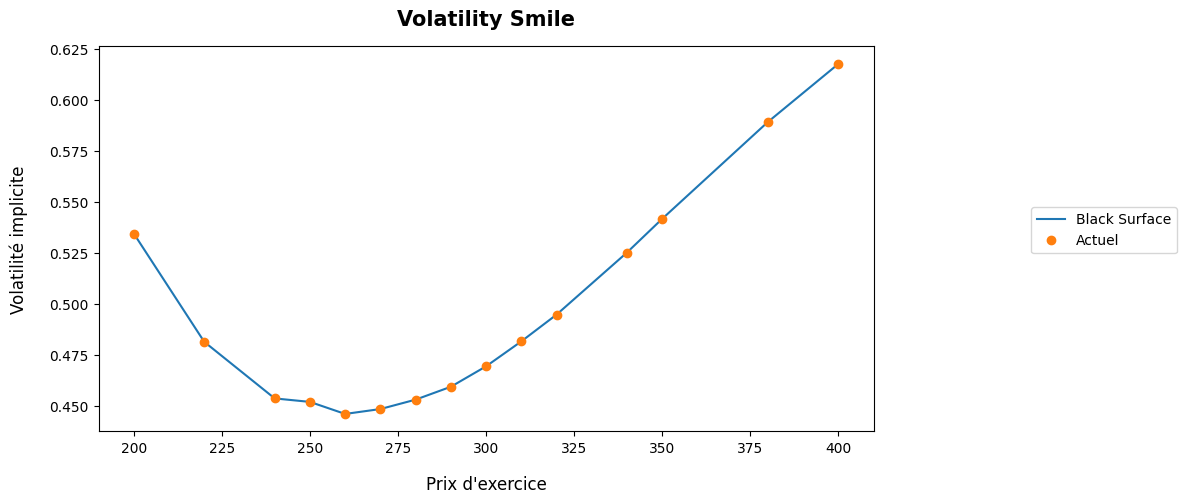

In [74]:
import numpy as np
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
from matplotlib import cm
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(strikes, implied_vols_surf, label="Black Surface")
ax.plot(strikes, actual_data, "o", label="Actuel")
ax.set_xlabel("Prix d'exercice", size=12, labelpad=15)
ax.set_ylabel("Volatilité implicite", size=12, labelpad=15)
ax.set_title("Volatility Smile", fontsize=15, fontweight='bold', pad=15)
legend = ax.legend(bbox_to_anchor=(1.4,0.6))

Le graphique montre une courbe en forme de sourire, ce qui est typique dans de nombreux marchés d'options. La volatilité implicite est plus élevée pour les options très "in-the-money" et très "out-of-the-money", et plus basse pour les options "at-the-money" (autour du prix actuel de l'actif). Ce phénomène peut indiquer que le marché s'attend à de plus grands mouvements de l'actif sous-jacent, soit à la hausse soit à la baisse, plutôt que de rester autour de son prix actuel.

### Visualisation 3D de la Surface de Volatilité

**L'ensemble de la surface de volatilité peut également être visualisé comme le graphique ci-dessous.**

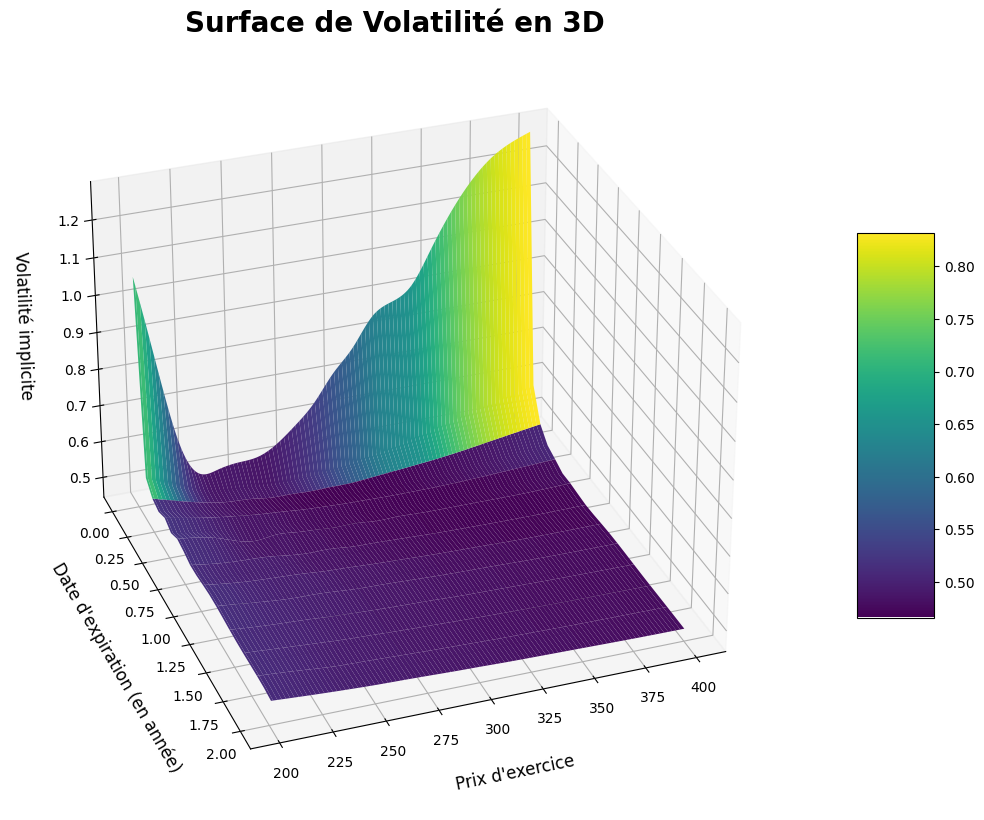

In [66]:
plot_years = np.arange(0, 2.1, 0.1)
plot_strikes = np.arange(400, 200, -1.0)  # This creates an array from 400 to 201

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(plot_strikes, plot_years)
# Ensure the arrays are in the correct order
Z = np.array([black_var_surface.blackVol(y, x) 
              for xr, yr in zip(X, Y) 
                  for x, y in zip(xr,yr) ]
             ).reshape(len(X), len(X[0]))

surf = ax.plot_surface(X,Y,Z, rstride=2, cstride=2, cmap=cm.viridis, 
                linewidth=0.1)
ax.set_xlabel("Prix d'exercice", size=12, labelpad=15)
ax.set_ylabel("Date d'expiration (en année)", size=12, labelpad=15)
ax.set_zlabel("Volatilité implicite", size=12, labelpad=15)
ax.set_title("Surface de Volatilité en 3D", fontsize=20, fontweight='bold')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(elev=30, azim=70)
ax.invert_xaxis()
plt.show()

Le graphique 3D présenté illustre une surface de volatilité implicite, qui est un outil essentiel dans le domaine de la finance pour visualiser comment la volatilité implicite des options varie avec le prix d'exercice et le temps jusqu'à l'expiration. Voici quelques points clés :

1. **Axe des Prix d'Exercice :** Sur l'axe horizontal, on observe les prix d'exercice des options. La surface montre comment la volatilité implicite change à mesure que le prix d'exercice augmente. Dans ce cas, il semble y avoir une augmentation de la volatilité implicite pour les options avec des prix d'exercice plus bas et plus hauts, tandis que pour les prix d'exercice intermédiaires, la volatilité implicite est plus basse. Cela peut indiquer une courbe de volatilité en forme de sourire, courante sur les marchés d'options.

2. **Axe de la Date d'Expiration :** Sur l'axe des profondeurs, on a la date d'expiration exprimée en années. La surface montre que la volatilité implicite a tendance à varier avec le temps jusqu'à l'expiration. On observe que la volatilité implicite tend à être plus élevée pour des échéances plus courtes et diminue pour des échéances plus longues, ce qui est souvent le cas lorsqu'il y a de l'incertitude à court terme sur le marché.

3. **Axe de la Volatilité Implicite :** Sur l'axe vertical, on a la volatilité implicite elle-même. Les couleurs de la surface représentent différents niveaux de volatilité, allant de plus faible (en violet) à plus élevé (en jaune). La gradation de couleur aide à identifier rapidement les régions de haute et de basse volatilité.

4. **Surface de Volatilité :** La forme de la surface elle-même est indicative de la structure de volatilité du marché. Une forme qui n'est pas plate suggère que la volatilité implicite n'est pas constante et varie selon le prix d'exercice et le temps jusqu'à l'expiration.

\pagebreak

## Calibration du Modèle de Heston

**Concentration sur la Date d'Expiration du 19/01/2024 pour la Calibration du Modèle de Heston**

Dans ce projet, je choisis de concentrer la calibration du modèle de Heston sur les options expirant le 19 janvier 2024. Cette focalisation spécifique permet une analyse approfondie et ciblée, offrant plusieurs avantages :

1. **Pertinence temporelle :** Le choix de cette date, offre un cadre temporel pertinent pour l'analyse des attentes à court terme du marché. Cette période est souvent cruciale pour les investisseurs et les traders, car elle peut capturer des mouvements de marché significatifs et des ajustements de volatilité.

2. **Simplicité et efficacité :** En se concentrant sur une seule date d'expiration, le processus de calibration est simplifié, permettant une analyse plus approfondie et précise. Cette approche réduit la complexité computationnelle et permet une attention plus détaillée aux spécificités de cette échéance particulière.

3. **Comparaison avec les données du marché :** Calibrer le modèle sur une échéance spécifique facilite la comparaison directe entre les résultats du modèle et les données de marché réelles pour cette date. Cela aide à évaluer l'exactitude du modèle et à comprendre comment il reflète les attentes du marché pour des périodes à court terme.

4. **Cohérence des données :** En choisissant une échéance unique, on assure une cohérence dans le jeu de données utilisé pour la calibration. Cela évite les complications qui pourraient survenir en mélangeant des données de différentes périodes, qui pourraient avoir des dynamiques de marché variables.

En résumé, cette stratégie ciblée maximise la pertinence et l'efficacité de la calibration du modèle de Heston, en fournissant des insights précis pour une période spécifique, tout en facilitant une comparaison détaillée avec les données du marché.

### Configuration du Modèle de Heston pour l'analyse de pricing d'options

Tout d'abord, des paramètres fictifs sont définis pour le modèle de Heston, incluant la volatilité initiale (`v0`), le taux de retour à la moyenne (`kappa`), la volatilité de long terme (`theta`), la corrélation (`rho`) et la volatilité de la volatilité (`sigma`). Ces paramètres définissent le comportement du processus de Heston et sont essentiels pour capturer la dynamique de la volatilité des options.

Le processus de Heston (`process`) est ensuite initialisé avec les structures de terme des taux sans risque et des dividendes, le prix au comptant actuel de l'actif sous-jacent, et les paramètres du modèle. Un moteur d'évaluation (`engine`) analytique (`AnalyticHestonEngine`) est lié au modèle, permettant le calcul des prix des options.

Des "helpers" de modèle de Heston sont créés pour chaque prix d'exercice. Ces helpers sont utilisés pour calibrer le modèle en fonction des données de marché. Pour chaque prix d'exercice (`strikes`), un `HestonModelHelper` est configuré avec la date d'expiration, le prix au comptant, le prix d'exercice, la volatilité implicite observée, et les courbes de taux. Le moteur de pricing est associé à chaque helper pour permettre l'évaluation.

In [50]:
day_count = ql.Actual365Fixed() # Définition de la convention de comptage des jours
calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond) # Définition du calendrier
calculation_date = ql.Date(17, 12, 2023) # Définition de la date de calcul
ql.Settings.instance().evaluationDate = calculation_date
spot = spot # Initialisation du prix au comptant
risk_free_rate = 0.05 # Taux sans risque
dividend_rate = 0.00 # Taux de dividende
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count)) # Création de la courbe de taux d'intérêt constant pour le taux sans risque
dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count)) # Création de la courbe de taux d'intérêt constant pour le taux de dividende

volatility = 0.3322  # Volatilité historique pour un mois 
# Paramètres fictifs pour le modèle de Heston
v0 = volatility*volatility; kappa = 0.2; theta = 0.02; sigma = 0.5; rho = -0.75;

# Initialisation du processus de Heston
process = ql.HestonProcess(flat_ts, dividend_ts, 
                           ql.QuoteHandle(ql.SimpleQuote(spot)), 
                           v0, kappa, theta, sigma, rho)
model = ql.HestonModel(process)
engine = ql.AnalyticHestonEngine(model)

heston_helpers = []
black_var_surface.setInterpolation("bicubic")
one_month_idx = 4  # Index pour l'échéance d'un mois
date = expiration_dates_for_model[one_month_idx]

# Création des helpers du modèle de Heston pour chaque prix d'exercice
for j, s in enumerate(strikes):
    t = (date - calculation_date )
    p = ql.Period(t, ql.Days)
    sigma = data_iv[one_month_idx][j]
    helper = ql.HestonModelHelper(p, calendar, spot, s, 
                                  ql.QuoteHandle(ql.SimpleQuote(sigma)),
                                  flat_ts, 
                                  dividend_ts)
    helper.setPricingEngine(engine)
    heston_helpers.append(helper)

Dans notre analyse, j'ai opté pour l'utilisation d'une volatilité historique d'un mois pour Tesla, s'élevant à 0,3322%. Cette valeur représente la variation standard des rendements de l'action sur une période de 30 jours, comme montrée dans la photo suivante:

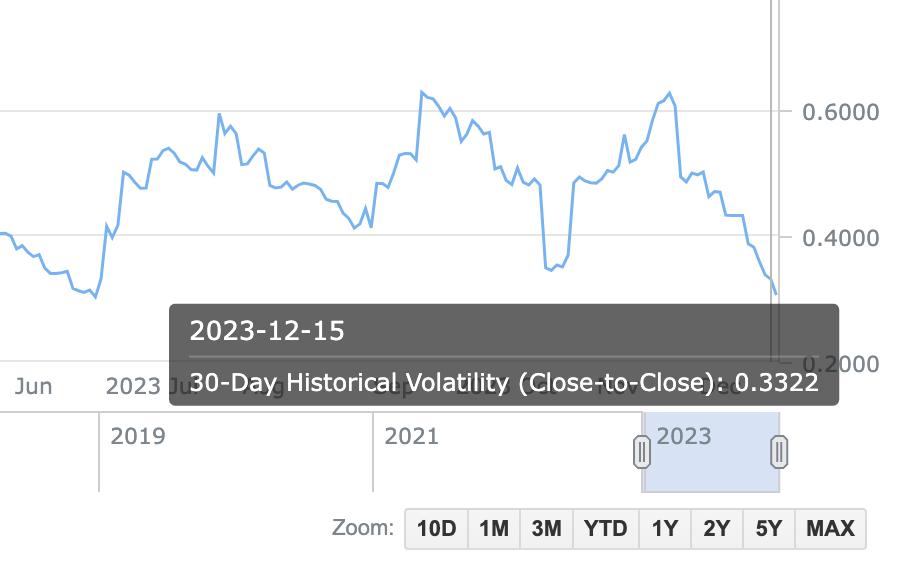

Source: [Historical Volatility (Close-to-Close) (30-Day)](https://www.alphaquery.com/stock/TSLA/volatility-option-statistics/30-day/historical-volatility)

### Calibration du Modèle de Heston et évaluation de l'erreur


#### Processus de calibration

1. **Initialisation de l'Algorithme de Calibration:** L'objet `LevenbergMarquardt` est initialisé avec des tolérances précises pour la convergence de l'algorithme.
2. **Calibration du Modèle:** La fonction `calibrate` du modèle de Heston est appelée avec les helpers de pricing, l'algorithme de Levenberg-Marquardt, et les critères de fin spécifiés. Cela permet d'ajuster les paramètres du modèle pour qu'ils correspondent au mieux aux données de marché observées.
3. **Extraction des Paramètres:** Après la calibration, les paramètres optimaux (theta, kappa, sigma, rho, v0) sont extraits et affichés. Ces paramètres représentent respectivement la volatilité de long terme, le taux de retour à la moyenne, la volatilité de la volatilité, la corrélation, et la volatilité actuelle du modèle.

#### Évaluation de l'Erreur

1. **Calcul de l'Erreur Relative:** L'erreur relative entre la valeur des options calculée par le modèle et la valeur de marché est calculée et affichée pour chaque prix d'exercice.
2. **Évaluation de la Performance du Modèle:** Une moyenne absolue de ces erreurs est calculée pour donner une indication globale de la performance du modèle par rapport aux données de marché.

In [52]:
# Calibration du modèle de Heston
lm = ql.LevenbergMarquardt(1e-8, 1e-8, 1e-8)
model.calibrate(heston_helpers, lm, 
                 ql.EndCriteria(500, 50, 1.0e-8,1.0e-8, 1.0e-8))

# Extraction des paramètres calibrés
theta, kappa, sigma, rho, v0 = model.params()
print ("Paramètres calibrés: theta = %f, kappa = %f, sigma = %f, rho = %f, v0 = %f" % (theta, kappa, sigma, rho, v0))

# Initialisation de la variable pour l'erreur moyenne
avg = 0.0

# Affichage des erreurs relatives pour chaque option
print ("%15s %25s" % ("Strikes", "Relative Error (%)"))
print ("="*50)
for i, opt in enumerate(heston_helpers):
    err = (opt.modelValue()/opt.marketValue() - 1.0)
    print ("%15.2f %20.7f " % (strikes[i], 100.0 * err))   
    avg += abs(err)
# Calcul et affichage de l'erreur moyenne
avg = avg*100.0/len(heston_helpers)
print ("Average Abs Error (%%) : %5.3f" % (avg))


Paramètres calibrés: theta = 0.271649, kappa = 62.404206, sigma = 16.244145, rho = -0.071121, v0 = 0.059763
        Strikes        Relative Error (%)
         200.00            0.9857049 
         220.00            1.9052095 
         240.00           -2.0560968 
         250.00           -3.8118655 
         260.00           -3.1951539 
         270.00           -3.8875342 
         280.00           -3.2940693 
         290.00           -1.2422893 
         300.00            0.7408976 
         310.00            2.5179378 
         320.00            4.2676355 
         340.00            4.6338998 
         350.00            3.1884329 
         380.00           -2.2763463 
         400.00           -5.3384192 
Average Abs Error (%) : 2.889


### Analyse des résultats de la calibration du modèle de Heston et conclusion

**Paramètres Calibrés du Modèle de Heston**

1. **Theta (0.271649)** : Représente la volatilité de long terme. Cette valeur indique une volatilité modérée sur le long terme pour le sous-jacent Tesla.
2. **Kappa (62.404206)** : Taux de retour vers la moyenne de la volatilité. Un taux élevé comme celui-ci suggère que la volatilité revient rapidement à son niveau de long terme.
3. **Sigma (16.244145)** : Volatilité de la volatilité. Cette valeur élevée indique des variations importantes de la volatilité du sous-jacent, signifiant un marché potentiellement plus incertain ou volatile.
4. **Rho (-0.071121)** : Corrélation entre le prix du sous-jacent et sa volatilité. Une légère corrélation négative indique que lorsque le prix du sous-jacent augmente, sa volatilité tend légèrement à diminuer, et vice versa.
5. **V0 (0.059763)** : Volatilité instantanée ou actuelle du sous-jacent. Cette valeur relativement basse suggère une volatilité actuelle modérée pour le sous-jacent.

**Erreurs Relatives par Prix d'Exercice (Strike)**

Les erreurs relatives entre les valeurs de marché et les valeurs prédites par le modèle pour différents prix d'exercice sont les suivantes :

| Prix d'Exercice | Erreur Relative (%) |
|-----------------|---------------------|
| 200.00          | 0.986               |
| ...             | ...                 |
| 400.00          | -5.338              |

Ces erreurs indiquent la précision du modèle pour chaque strike. Les erreurs négatives suggèrent une sous-évaluation par le modèle, tandis que les erreurs positives indiquent une surévaluation.

**Erreur Absolue Moyenne**

Avec une erreur absolue moyenne de 2.889%, le modèle montre une précision globale acceptable mais révèle des écarts significatifs pour certains strikes. Cette variation suggère que, bien que le modèle de Heston soit globalement efficace, il pourrait y avoir des zones d'amélioration, en particulier pour les strikes extrêmes.

#### Conclusion

Le modèle de Heston, avec ses paramètres calibrés, fournit une représentation raisonnable des prix du marché des options Tesla. Cependant, les écarts observés, en particulier pour certains strikes spécifiques, mettent en lumière le besoin de peaufiner le modèle ou d'explorer d'autres facteurs qui pourraient influencer la précision de la calibration. Ces résultats soulignent l'importance d'une analyse continue et de l'ajustement du modèle pour s'aligner au mieux avec les conditions du marché.

\pagebreak

# Bibliographies

Google Sites: [Brian Byrne Financial Data Analytics](https://sites.google.com/view/brian-byrne-data-analytics/home?authuser=0)

Luigi Ballabio and Goutham Balaraman. *QuantLib Python Cookbook*, [Leanpub](http://leanpub.com/quantlibpythoncookbook) 2022.

---

\pagebreak

# Aller plus loin...

### Processus général de Calibration du Modèle de Heston avec des méthodes différentes

Ce script en Python met en place et calibre un modèle de Heston pour le pricing d'options en utilisant QuantLib et SciPy. Il procède en plusieurs étapes clés :

- **Configuration initiale** : Définit les paramètres de base tels que le calendrier, la date de calcul, les taux sans risque et de dividende.

- **Initialisation du modèle de Heston** : Configure le modèle avec des paramètres de départ.

- **Création des Helpers pour la Calibration** : Prépare des assistants spécifiques pour chaque option en vue de leur calibration.

- **Fonction de Coût pour la Calibration** : Génère une fonction d'erreur utilisée pour ajuster les paramètres du modèle afin de minimiser l'écart entre les valeurs théoriques et les valeurs observées sur le marché.

- **Rapport de Calibration** : Évalue et affiche l'erreur de calibration, indiquant l'écart entre les valeurs de marché et celles estimées par le modèle.

In [336]:
import QuantLib as ql
from math import pow, sqrt 
import numpy as np 

# Configuration de base
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond) 
calculation_date = ql.Date(17, 12, 2023) 
ql.Settings.instance().evaluationDate = calculation_date
volatility = 0.3322
spot = spot 
risk_free_rate = 0.05 
dividend_rate = 0.00
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count)) 
dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count))

# Paramètres initiaux du modèle de Heston
v0 = volatility*volatility; kappa = 0.2; theta = 0.02; sigma = 0.5; rho = -0.75;

# Configuration du modèle de Heston
def setup_model(_flat_ts, _dividend_ts, _spot, init_condition=(theta,kappa,sigma,rho,v0)):
    theta,kappa,sigma,rho,v0 = init_condition
    process = ql.HestonProcess(_flat_ts, _dividend_ts, ql.QuoteHandle(ql.SimpleQuote(_spot)), v0, kappa, theta, sigma, rho)
    model = ql.HestonModel(process)
    engine = ql.AnalyticHestonEngine(model)
    return model, engine 

# Configuration des helpers pour la calibration
def setup_helpers(engine, expiration_dates, strikes, data, ref_date, spot, flat_ts, dividend_ts):
    heston_helpers = []
    black_var_surface.setInterpolation("bicubic")
    one_month_idx = 4 # 12th row in data is for 1 month expiry
    date = expiration_dates_for_model[one_month_idx]
    for j, s in enumerate(strikes):
        t = (date - calculation_date )
        p = ql.Period(t, ql.Days)
        sigma = data_iv[one_month_idx][j]
        #sigma = black_var_surface.blackVol(t/365.25, s)
        helper = ql.HestonModelHelper(p, calendar, spot, s, 
                                    ql.QuoteHandle(ql.SimpleQuote(sigma)),
                                    flat_ts, 
                                    dividend_ts)
        helper.setPricingEngine(engine)
        heston_helpers.append(helper)
    return heston_helpers

# Générateur de la fonction de coût pour la calibration
def cost_function_generator(model, helpers,norm=False):
    def cost_function(params):
        params_ = ql.Array(list(params)) 
        model.setParams(params_) 
        error = [h.calibrationError() for h in helpers] 
        if norm:
            return np.sqrt(np.sum(np.abs(error))) 
        else:
            return error 
    return cost_function

# Rapport sur la performance de la calibration
def calibration_report(helpers, detailed=False):
    avg = 0.0
    if detailed:
        print("%15s %25s %15s %15s %20s" % ( "Strikes", "Expiry", "Market Value", "Model Value", "Relative Error (%)")) 
        print("="*100) 
    for i, opt in enumerate(helpers):
        err = (opt.modelValue()/opt.marketValue() - 1.0)
        if detailed:
            print("%15.2f %25s %14.5f %15.5f %20.7f " % ( strike, str(date), opt.marketValue(), opt.modelValue(), 100.0*(opt.modelValue()/opt.marketValue() - 1.0)))
        avg += abs(err) 
    avg = avg*100.0/len(helpers)
    if detailed: print("-"*100) 
    summary = "Average Abs Error (%%) : %5.9f" % (avg) 
    print(summary) 
    return avg

In [337]:
summary= []

In [338]:
volatility = 0.3322 # the historical vols for a month 
# dummy parameters
v0 = volatility*volatility; kappa = 0.2; theta = 0.02; sigma = 0.5; rho = -0.75;

model1, engine1 = setup_model(flat_ts, dividend_ts, spot, init_condition=(theta,kappa,sigma,rho,v0))
heston_helpers1= setup_helpers( engine1, expiration_dates_for_model, strikes, data_iv, calculation_date, spot, flat_ts, dividend_ts ) 
initial_condition = list(model1.params())

lm = ql.LevenbergMarquardt(1e-8, 1e-8, 1e-8)
model1.calibrate(heston_helpers1, lm,ql.EndCriteria(500, 300, 1.0e-8,1.0e-8, 1.0e-8))
theta, kappa, sigma, rho, v0 = model1.params()
print("Paramètres calibrés: theta = %.4f, kappa = %.4f, sigma = %.4f, rho = %.4f, v0 = %.4f" %
(theta, kappa, sigma, rho, v0)) 
error = calibration_report(heston_helpers1) 
summary.append(["Levenberg Marquardt (QuantLib)", error] + list(model1.params()))

Paramètres calibrés: theta = 0.2288, kappa = 49.1936, sigma = 12.9071, rho = -0.0712, v0 = 0.3508
Average Abs Error (%) : 2.892713239


In [339]:
from scipy.optimize import root

volatility = 0.3322 # the historical vols for a month 
# dummy parameters
v0 = volatility*volatility; kappa = 0.2; theta = 0.02; sigma = 0.5; rho = -0.75;

model2, engine2 = setup_model(flat_ts, dividend_ts, spot, init_condition=(theta,kappa,sigma,rho,v0))
heston_helpers2 = setup_helpers( engine2, expiration_dates_for_model, strikes, data_iv, calculation_date, spot, flat_ts, dividend_ts ) 
initial_condition = list(model2.params())

cost_function = cost_function_generator(model2, heston_helpers2) 
sol = root(cost_function, initial_condition, method='lm') 
theta, kappa, sigma, rho, v0 = model2.params()

print("Paramètres calibrés: theta = %.4f, kappa = %.4f, sigma = %.4f, rho = %.4f, v0 = %.4f" %(theta, kappa, sigma, rho, v0)) 
error = calibration_report(heston_helpers2) 
summary.append(["Levenberg Marquardt (SciPy)", error] + list(model2.params()))


Paramètres calibrés: theta = 0.2690, kappa = 61.4726, sigma = 16.0109, rho = -0.0711, v0 = 0.0828
Average Abs Error (%) : 2.889456776


In [340]:
from scipy.optimize import least_squares

volatility = 0.3322 # the historical vols for a month 
# dummy parameters
v0 = volatility*volatility; kappa = 0.2; theta = 0.02; sigma = 0.5; rho = -0.75;

model3, engine3 = setup_model(flat_ts, dividend_ts, spot, init_condition=(theta,kappa,sigma,rho,v0))
heston_helpers3 = setup_helpers( engine3, expiration_dates_for_model, strikes, data_iv, calculation_date, spot, flat_ts, dividend_ts ) 
initial_condition = list(model3.params())


cost_function = cost_function_generator(model3, heston_helpers3) 
sol = least_squares(cost_function, initial_condition) 
theta, kappa, sigma, rho, v0 = model3.params()

print("Paramètres calibrés: theta = %.4f, kappa = %.4f, sigma = %.4f, rho = %.4f, v0 = %.4f" % (theta, kappa, sigma, rho, v0)) 
error = calibration_report(heston_helpers3) 
summary.append(["Levenberg Marquardt (QuantLib)", error] + list(model3.params()))

Paramètres calibrés: theta = 0.2202, kappa = 44.2872, sigma = 11.7212, rho = -0.0714, v0 = 0.3820
Average Abs Error (%) : 2.894682223


In [341]:
from pandas import DataFrame 
DataFrame( summary, columns=["Name", "Avg Abs Error","Theta", "Kappa", "Sigma", "Rho", "V0"],index=['']*len(summary))

,Name,Avg Abs Error,Theta,Kappa,Sigma,Rho,V0
,Levenberg Marquardt (QuantLib),2.892713,0.228806,49.193649,12.907106,-0.071234,0.350795
,Levenberg Marquardt (SciPy),2.889457,0.268967,61.472641,16.010908,-0.071130,0.082821
,Levenberg Marquardt (QuantLib),2.894682,0.220210,44.287187,11.721229,-0.071366,0.382015
